<a href="https://colab.research.google.com/github/Sarthaksaraf96/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Regression - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv(r'/content/drive/MyDrive/SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [3]:
# Dataset First Look
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(8760, 14)

### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# Dataset Describe
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

# Extracting additional features
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

<ipython-input-12-ae4a772f64c0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [13]:
data['Temperature(°C)'].max()

39.4

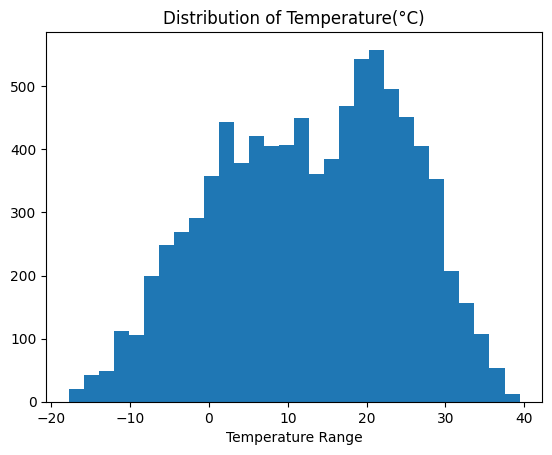

In [14]:
# Chart - 1 visualization code
plt.hist(data['Temperature(°C)'],bins =30 )
plt.xlabel('Temperature Range')
plt.title('Distribution of Temperature(°C)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

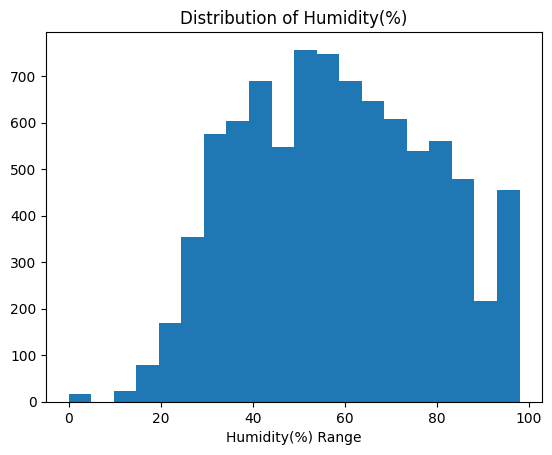

In [15]:
# Chart - 2 visualization code
plt.hist(data['Humidity(%)'],bins =20 )
plt.xlabel('Humidity(%) Range')
plt.title('Distribution of Humidity(%)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

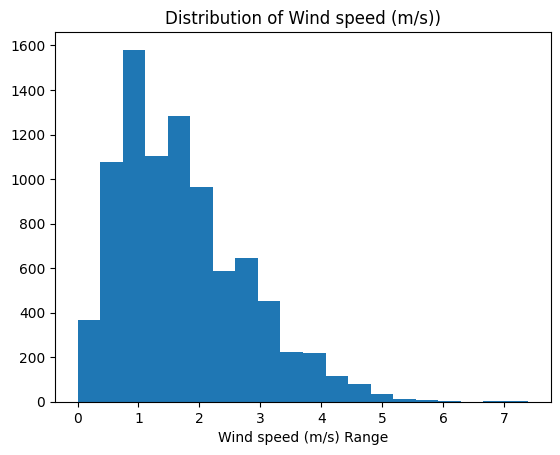

In [16]:
# Chart - 3 visualization code
plt.hist(data['Wind speed (m/s)'],bins =20 )
plt.xlabel('Wind speed (m/s) Range')
plt.title('Distribution of Wind speed (m/s))')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

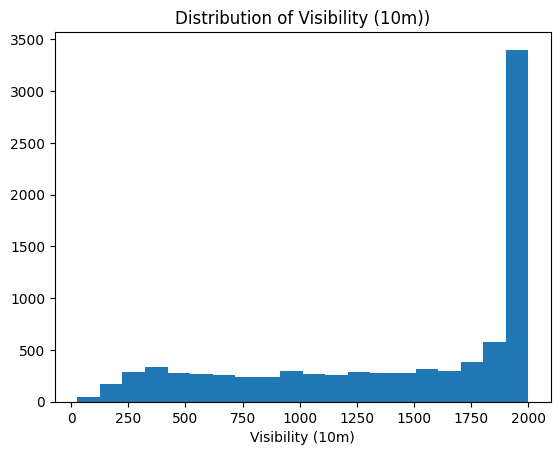

In [17]:
# Chart - 4 visualization code
plt.hist(data['Visibility (10m)'],bins =20 )
plt.xlabel('Visibility (10m)')
plt.title('Distribution of Visibility (10m))')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

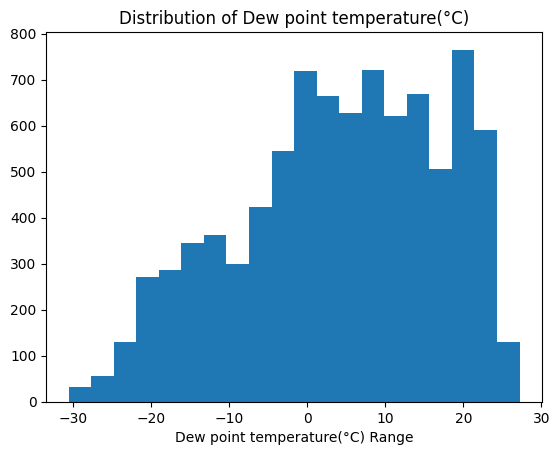

In [18]:
# Chart - 5 visualization code
plt.hist(data['Dew point temperature(°C)'],bins =20 )
plt.xlabel('Dew point temperature(°C) Range')
plt.title('Distribution of Dew point temperature(°C)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

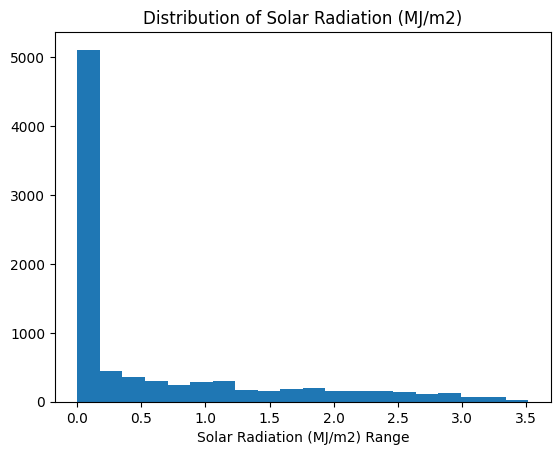

In [19]:
# Chart - 6 visualization code
plt.hist(data['Solar Radiation (MJ/m2)'],bins =20 )
plt.xlabel('Solar Radiation (MJ/m2) Range')
plt.title('Distribution of Solar Radiation (MJ/m2)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

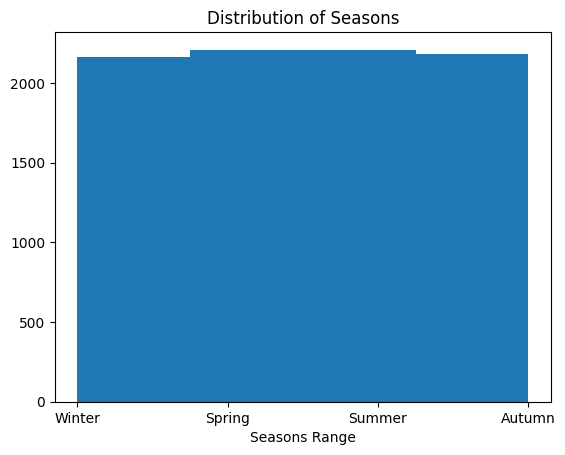

In [20]:
# Chart - 7 visualization code
plt.hist(data['Seasons'],bins =4 )
plt.xlabel('Seasons Range')
plt.title('Distribution of Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

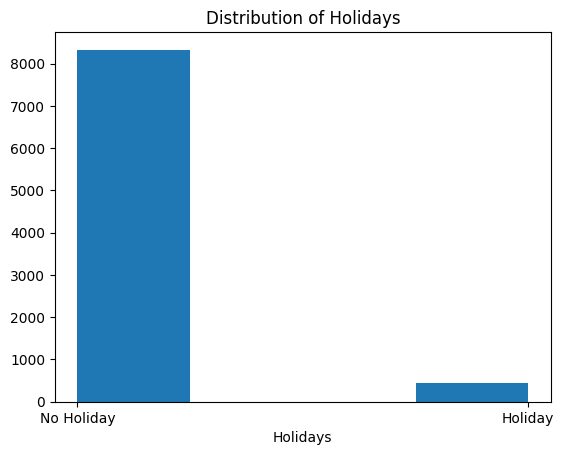

In [21]:
# Chart - 8 visualization code
plt.hist(data['Holiday'],bins =4 )
plt.xlabel('Holidays')
plt.title('Distribution of Holidays')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [22]:
# Chart - 9 visualization code
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')

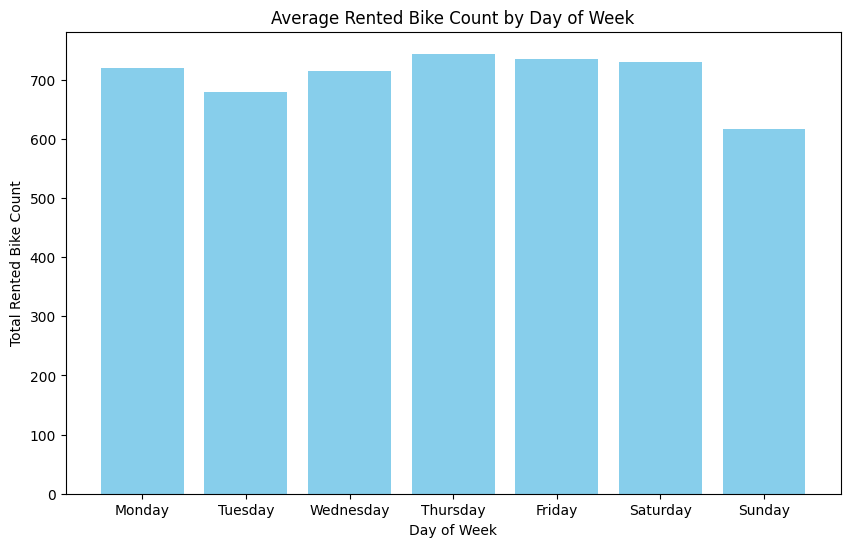

In [23]:
# Grouping by 'DayOfWeek' and summing 'Rented Bike Count'
rentals_per_day = data.groupby('DayOfWeek')['Rented Bike Count'].mean()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(rentals_per_day.index, rentals_per_day.values, color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Total Rented Bike Count')
plt.title('Average Rented Bike Count by Day of Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

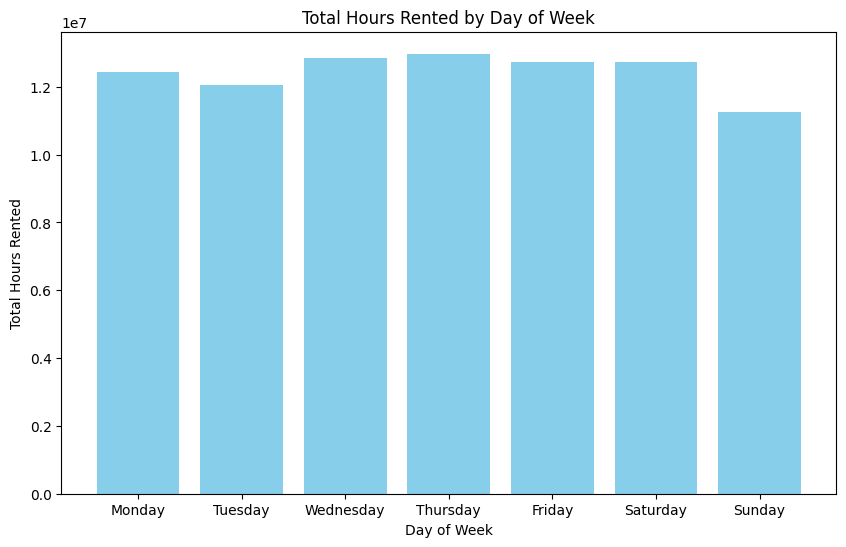

In [24]:
# Chart - 10 visualization code
# Calculate total hours rented for each day of the week
# Calculate total hours rented for each day of the week
data['Total Hours Rented'] = data['Rented Bike Count'] * data['Hour']
total_hours_rented_per_day = data.groupby('DayOfWeek')['Total Hours Rented'].sum()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(total_hours_rented_per_day.index, total_hours_rented_per_day.values, color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Total Hours Rented')
plt.title('Total Hours Rented by Day of Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

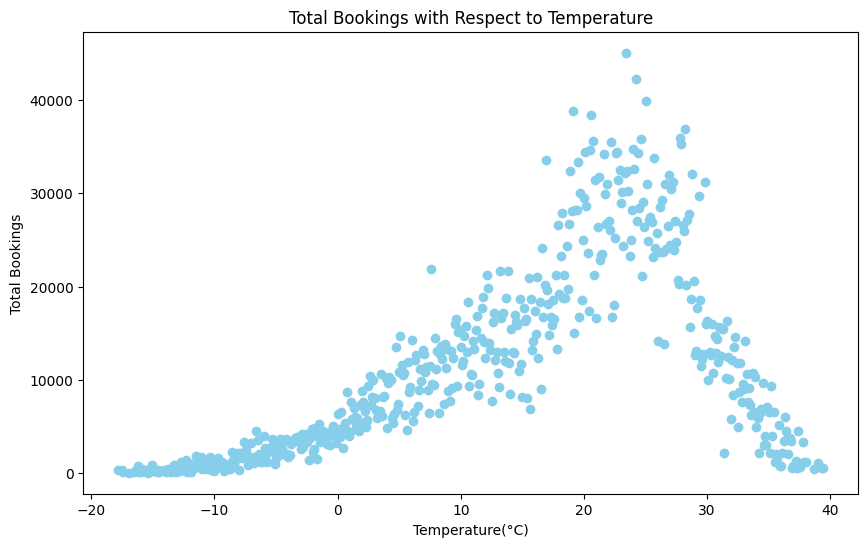

In [25]:
# Chart - 11 visualization code
# Grouping by 'Temperature(°C)' and summing 'Rented Bike Count'
bookings_per_temperature = data.groupby('Temperature(°C)')['Rented Bike Count'].sum()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bookings_per_temperature.index, bookings_per_temperature.values, color='skyblue')
plt.xlabel('Temperature(°C)')
plt.ylabel('Total Bookings')
plt.title('Total Bookings with Respect to Temperature')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [26]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'DayOfWeek', 'Month', 'Year',
       'Total Hours Rented'],
      dtype='object')

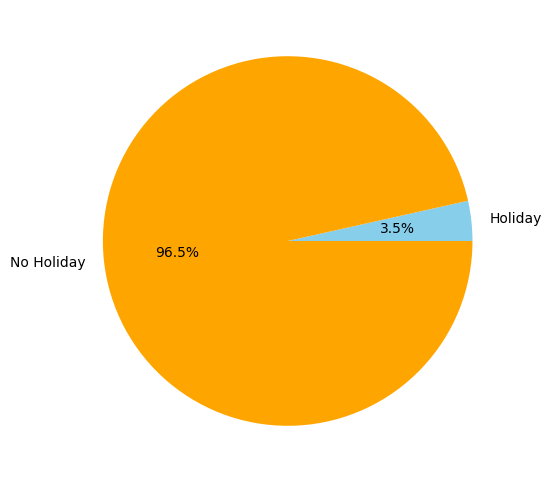

In [27]:
# Chart - 12 visualization code
# Grouping by holidays and summing 'Rented Bike Count'
bookings_on_holidays= data.groupby('Holiday')['Rented Bike Count'].sum()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.pie( bookings_on_holidays.values, labels=bookings_on_holidays.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [28]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'DayOfWeek', 'Month', 'Year',
       'Total Hours Rented'],
      dtype='object')

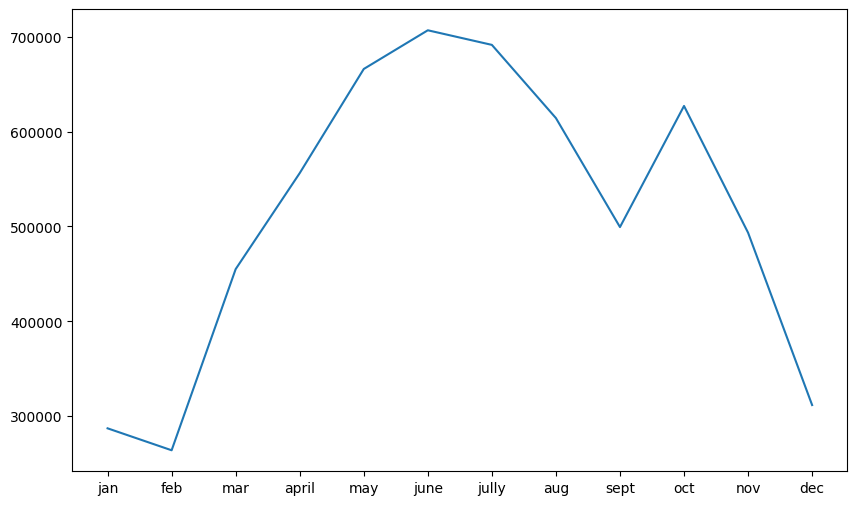

In [29]:
# Chart - 13 visualization code
booking_months= data.groupby('Month')['Rented Bike Count'].sum()
months = ['jan','feb','mar','april','may','june','jully','aug','sept','oct','nov','dec']
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.plot( months , booking_months.values)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-30-c26395b6f63f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


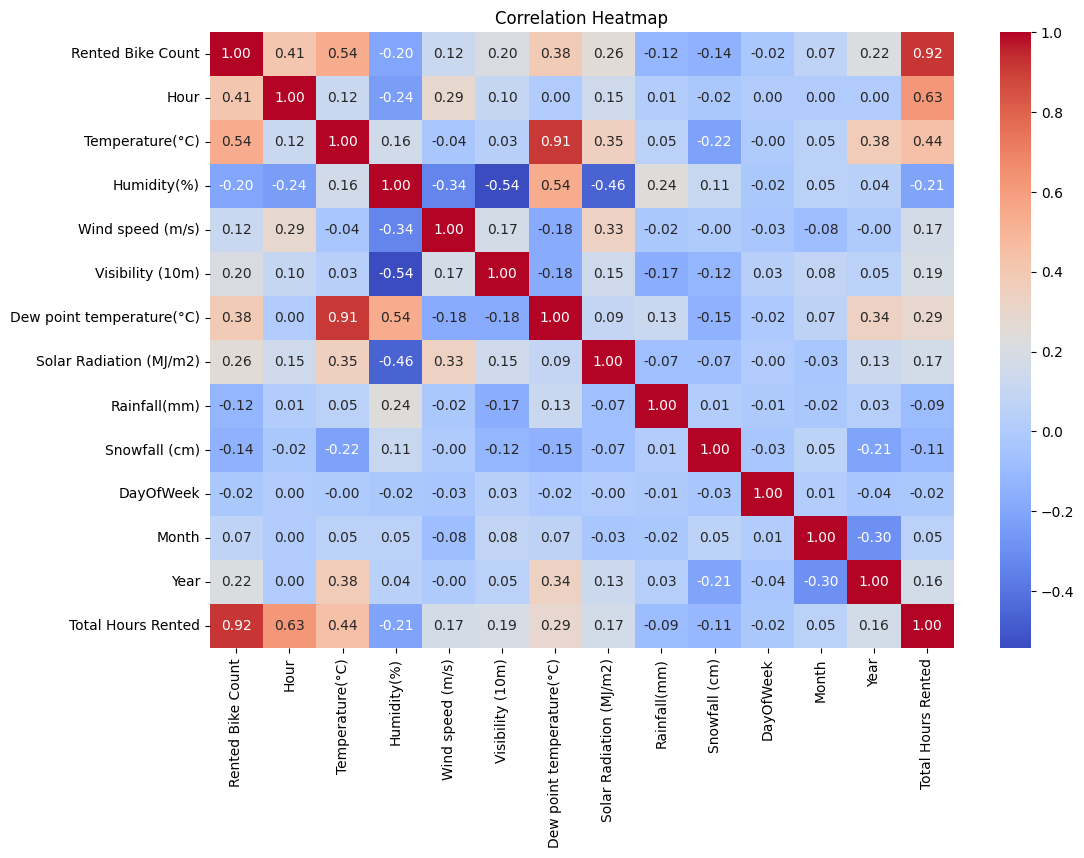

In [30]:
# Correlation Heatmap visualization code
# Calculate the correlation matrix
corr = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

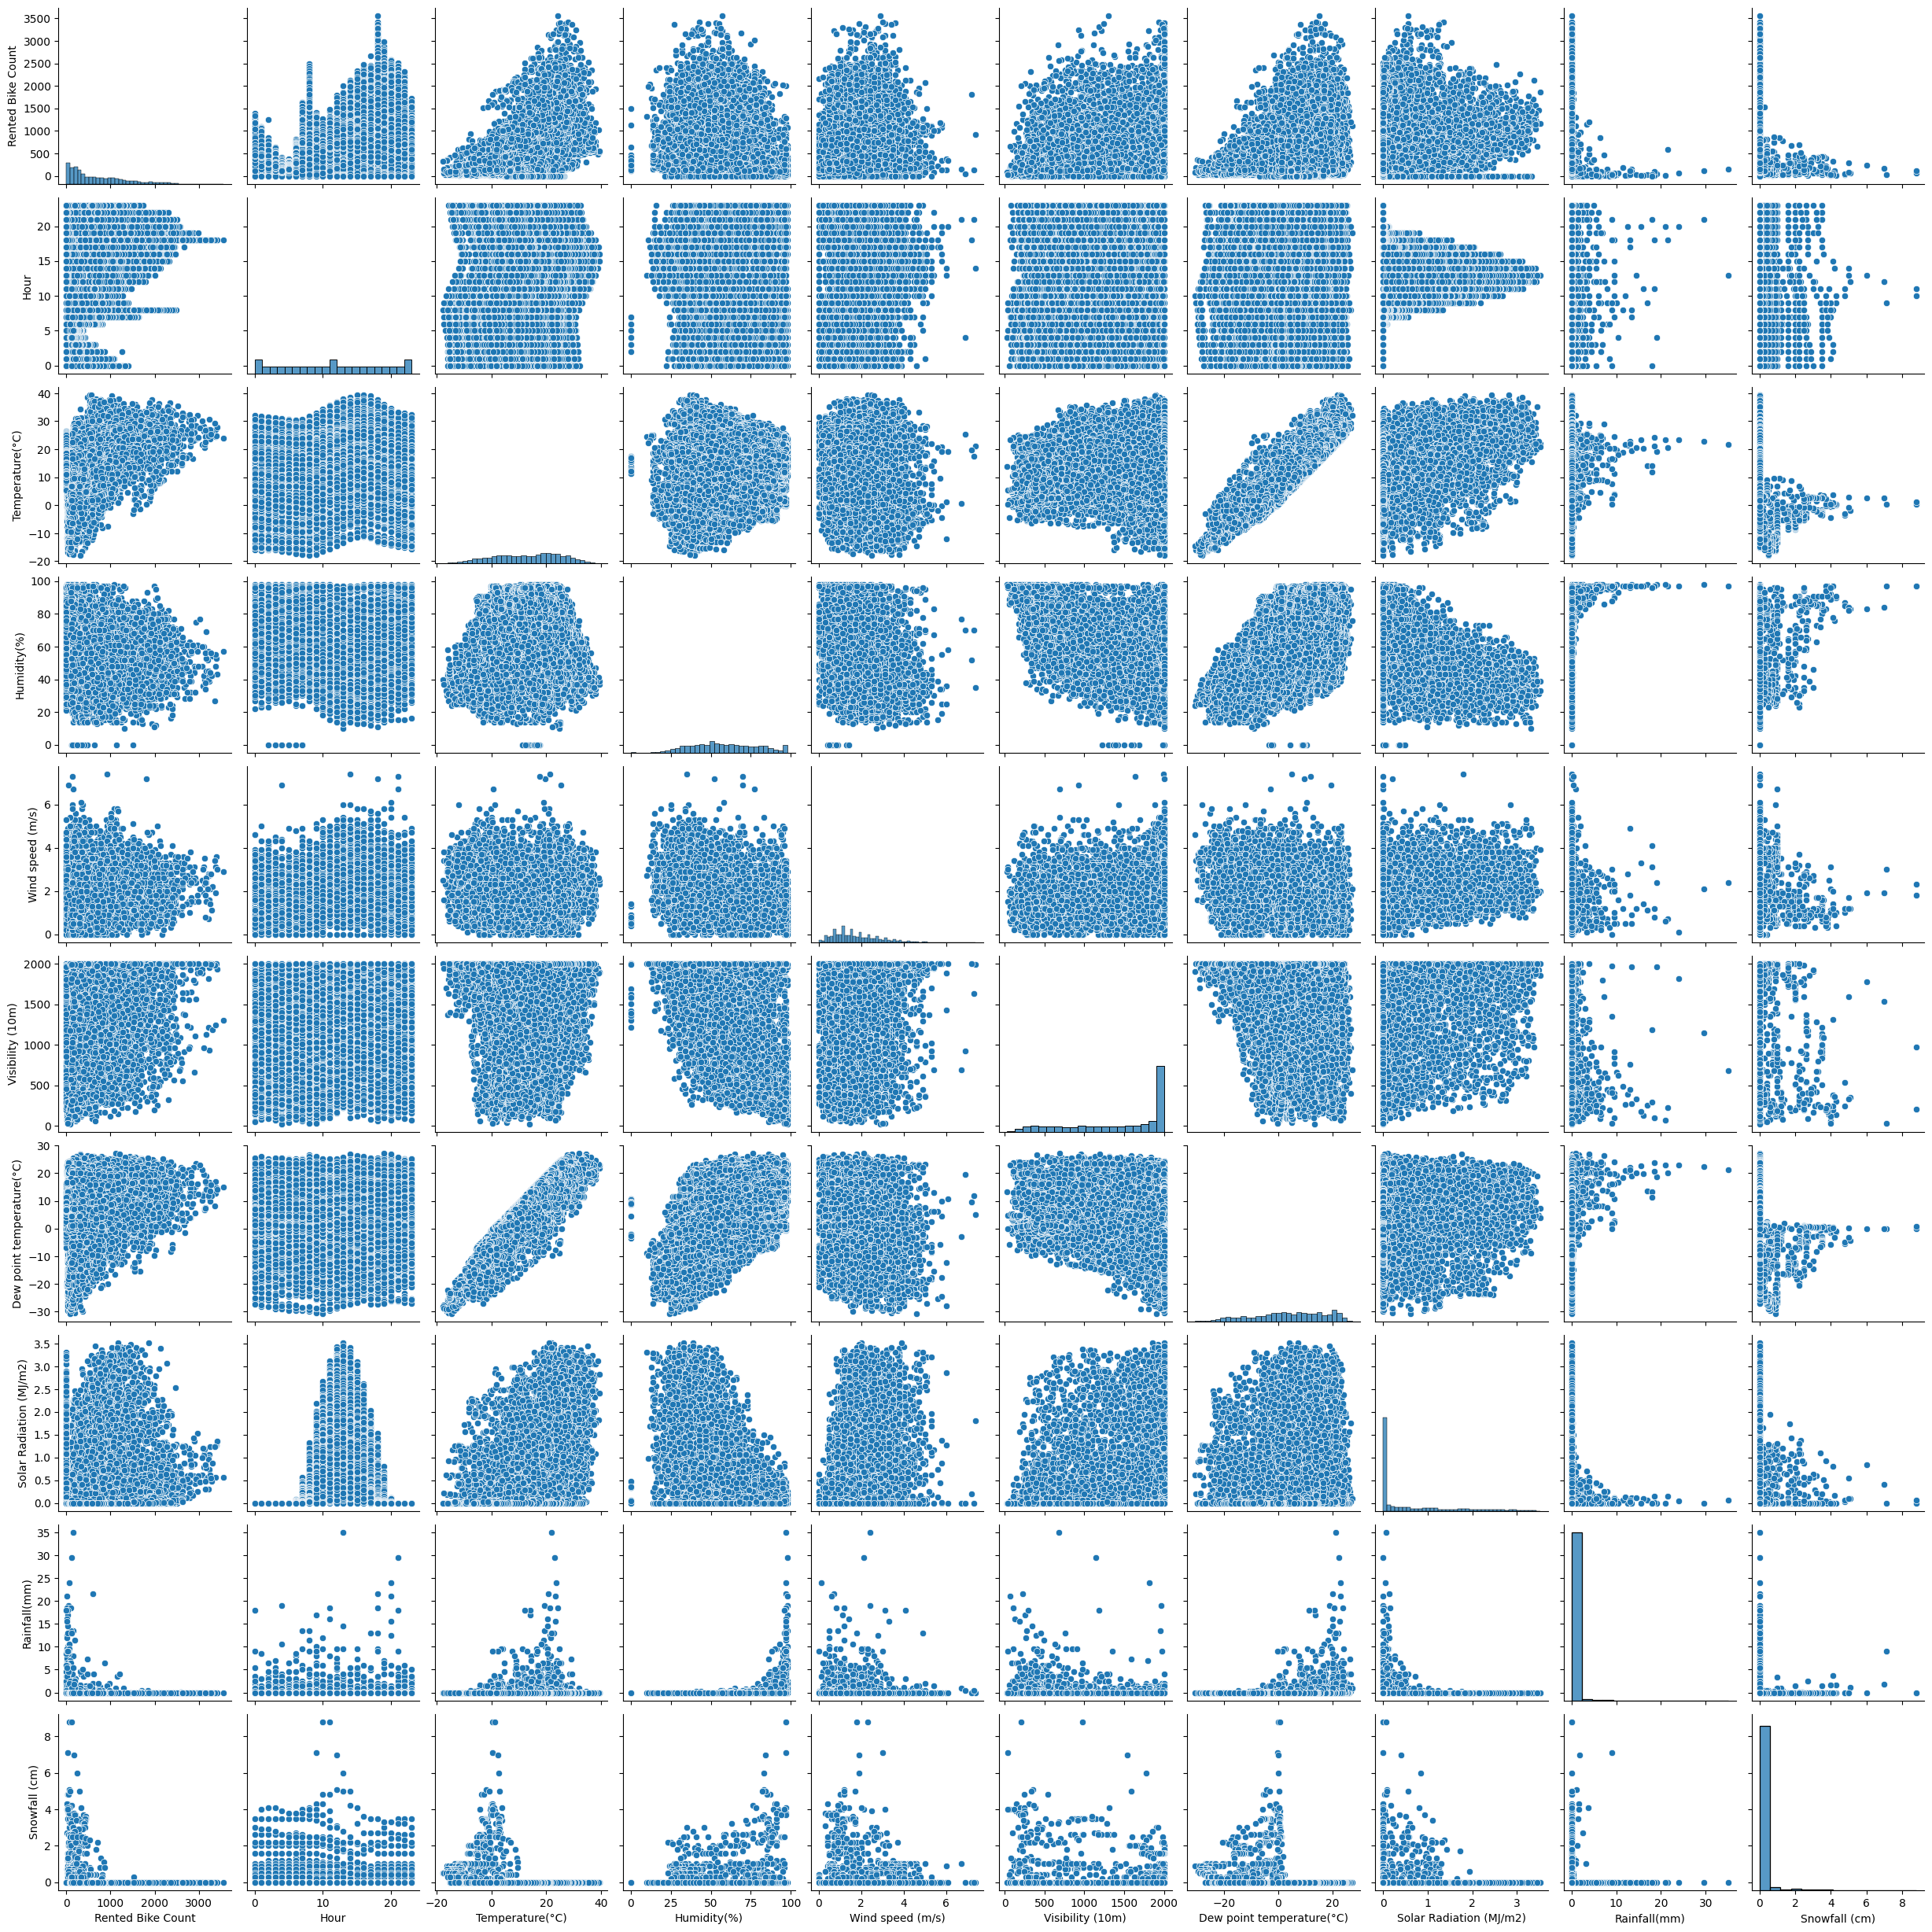

In [31]:
# Pair Plot visualization code
# Selecting a subset of columns for pair plotting
cols_for_pairplot = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Creating the pair plot
sns.pairplot(data[cols_for_pairplot])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The mean number of rented bikes on weekends is equal to the mean number of rented bikes on weekdays.

**Alternative Hypothesis (H1):** The mean number of rented bikes on weekends is higher than the mean number of rented bikes on weekdays.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

weekend_data = data[(data['DayOfWeek'] == 5) | (data['DayOfWeek'] == 6)]['Rented Bike Count']
weekday_data = data[(data['DayOfWeek'] >= 0) & (data['DayOfWeek'] <= 4)]['Rented Bike Count']

t_stat, p_val = stats.ttest_ind(weekend_data, weekday_data, alternative='greater')
alpha = 0.05

if p_val < alpha:
    print("Reject null hypothesis. There is sufficient evidence to suggest that the demand for rented bikes is higher on weekends.")
else:
    print("Fail to reject null hypothesis. There is not enough evidence to suggest that the demand for rented bikes is higher on weekends.")


Fail to reject null hypothesis. There is not enough evidence to suggest that the demand for rented bikes is higher on weekends.


##### Which statistical test have you done to obtain P-Value?

The p-value obtained from this test indicates the probability of observing the data (or more extreme results) if the null hypothesis is true. If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test because it is suitable for comparing the means of two independent groups, which is exactly what we need to do in this scenario.

In Statement 1, we are comparing the mean number of rented bikes on weekends (Saturday and Sunday) to the mean number of rented bikes on weekdays (Monday to Friday). Since the two groups (weekends and weekdays) are independent of each other (the number of rented bikes on one day does not affect the number on another day), an independent samples t-test is appropriate.

The null hypothesis assumes that the mean number of rented bikes on weekends is equal to the mean number on weekdays, while the alternative hypothesis suggests that the mean number on weekends is higher than weekdays. The t-test allows us to determine if there is enough statistical evidence to reject the null hypothesis in favor of the alternative hypothesis based on the observed data.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no correlation between temperature and the number of rented bikes.

**Alternative Hypothesis (H1):** There is a positive correlation between temperature and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
corr, p_val = stats.pearsonr(data['Temperature(°C)'], data['Rented Bike Count'])

if p_val < alpha:
    print("Reject null hypothesis. There is a positive correlation between temperature and the number of rented bikes.")
else:
    print("Fail to reject null hypothesis. There is no significant correlation between temperature and the number of rented bikes.")


Reject null hypothesis. There is a positive correlation between temperature and the number of rented bikes.


##### Which statistical test have you done to obtain P-Value?

Pearson's correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. The test computes the correlation coefficient and its associated p-value. If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant correlation between temperature and the number of rented bikes.

##### Why did you choose the specific statistical test?

I chose Pearson's correlation coefficient test for Statement 2 ("There is a positive correlation between temperature and the number of rented bikes") because it is commonly used to measure the strength and direction of a linear relationship between two continuous variables.

In this case, we are interested in understanding if there is a relationship between the temperature (a continuous variable) and the number of rented bikes (also a continuous variable). The Pearson correlation coefficient (r) ranges from -1 to 1, where:

r = 1 indicates a perfect positive linear relationship,
r = -1 indicates a perfect negative linear relationship, and
r = 0 indicates no linear relationship.
The null hypothesis assumes that there is no correlation between temperature and the number of rented bikes (r = 0), while the alternative hypothesis suggests a positive correlation (r > 0). By conducting the Pearson's correlation test and examining the p-value, we can determine if there is enough evidence to reject the null hypothesis and conclude that there is a significant positive correlation between temperature and the number of rented bikes.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no difference in the mean number of rented bikes on rainy days compared to non-rainy days.

**Alternative Hypothesis (H1):** The mean number of rented bikes is lower on rainy days compared to non-rainy days.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
rainy_data = data[data['Rainfall(mm)'] > 0]['Rented Bike Count']
non_rainy_data = data[data['Rainfall(mm)'] == 0]['Rented Bike Count']

t_stat, p_val = stats.ttest_ind(rainy_data, non_rainy_data, alternative='less')

if p_val < alpha:
    print("Reject null hypothesis. The presence of rainfall negatively affects the number of rented bikes.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in the mean number of rented bikes on rainy days compared to non-rainy days.")

Reject null hypothesis. The presence of rainfall negatively affects the number of rented bikes.


##### Which statistical test have you done to obtain P-Value?

 I have used an independent samples t-test to obtain the p-value

##### Why did you choose the specific statistical test?

I chose the two-sample t-test to compare the mean number of rented bikes on rainy days to the mean number on non-rainy days. Here's why it's appropriate:

**1) Nature of the Data:** The data for the number of rented bikes is continuous and numerical, making it suitable for a t-test.

**2) Comparison of Means: **We are interested in comparing the mean number of rented bikes between two independent groups (rainy days and non-rainy days).

**3) Assumption of Normality: **The t-test assumes that the data in each group is normally distributed. While this assumption may not be perfectly met, the t-test is robust to deviations from normality, especially with large sample sizes.

**4) Independence:** The observations in each group are assumed to be independent of each other, which is satisfied in this case.

**5) Two-Tailed Test:** The alternative='less' parameter indicates that we are testing if the mean number of rented bikes on rainy days is less than the mean on non-rainy days, aligning with the hypothesis that rainfall negatively affects the number of rented bikes.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
DayOfWeek                    0
Month                        0
Year                         0
Total Hours Rented           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present in this data

### 2. Handling Outliers

In [36]:
# Handling Outliers & Outlier treatments
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'DayOfWeek', 'Month', 'Year',
       'Total Hours Rented'],
      dtype='object')

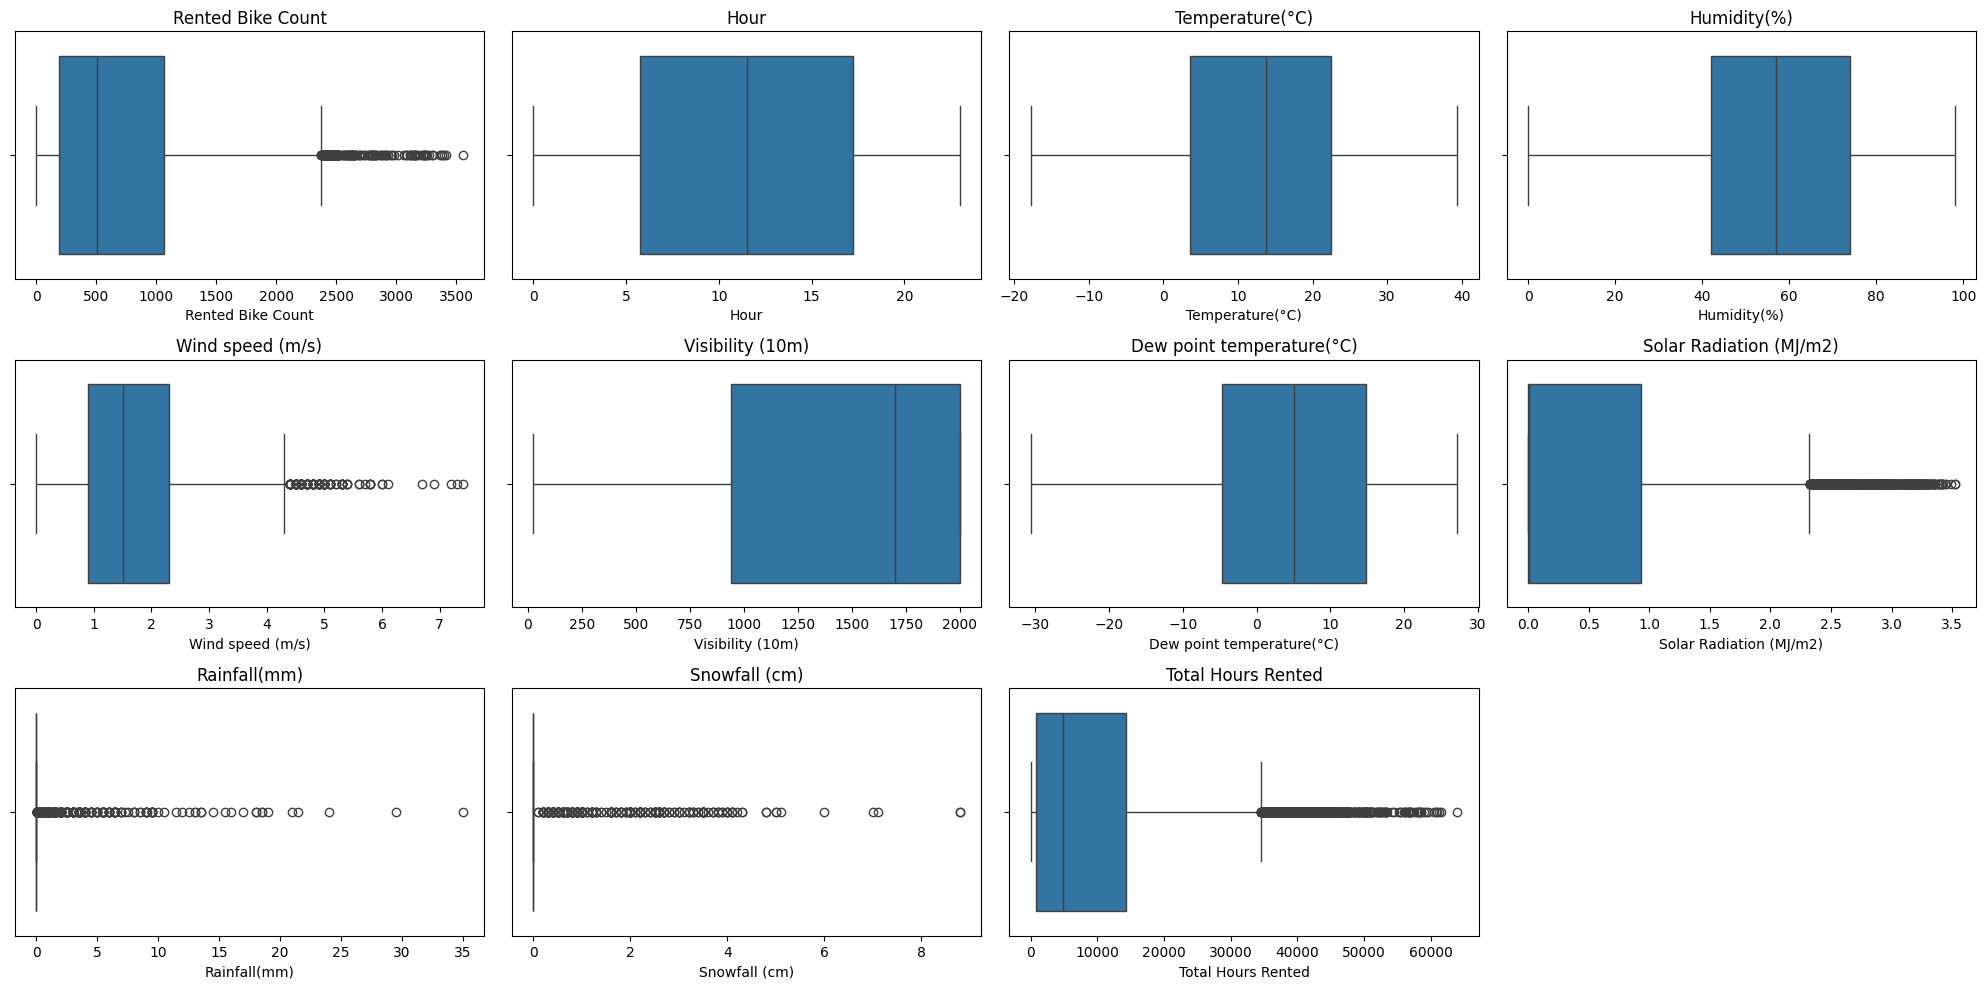

In [37]:
# Selecting numeric columns for box plot
numeric_cols = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
                'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
                'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Total Hours Rented']

# Creating box plots for each numeric column
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [38]:
from scipy import stats

# Calculating z-scores for each numeric column
z_scores = stats.zscore(data[numeric_cols])

# Finding outliers based on z-score threshold
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)

# Displaying rows with outliers
outlier_data = data[outliers]
outlier_data

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
85   2017-04-12                391    13              0.0           30   
87   2017-04-12                341    15             -0.1           25   
89   2017-04-12                515    17             -1.3           26   
222  2017-10-12                  9     6             -0.5           90   
223  2017-10-12                 20     7             -0.4           92   
...         ...                ...   ...              ...          ...   
8625 2018-11-25                355     9              2.3           88   
8626 2018-11-25                430    10              4.0           76   
8627 2018-11-25                522    11              6.0           66   
8628 2018-11-25                700    12              6.9           59   
8629 2018-11-25                675    13              8.8           53   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
85                 5.4              1938                      -15.5   
87                 5.8              2000                      -17.8   
89                 5.3              2000                      -18.3   
222                0.9                91                       -1.9   
223                1.1               121                       -1.5   
...                ...               ...                        ...   
8625               1.1               286                        0.5   
8626               1.3               404                        0.1   
8627               0.9               573                        0.1   
8628               0.9               669                       -0.5   
8629               1.5               778                       -0.2   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
85                       1.17           0.0            0.0  Winter   
87                       0.88           0.0            0.0  Winter   
89                       0.18           0.0            0.0  Winter   
222                      0.00           2.5            2.7  Winter   
223                      0.00           0.0            4.0  Winter   
...                       ...           ...            ...     ...   
8625                     0.41           0.0            2.5  Autumn   
8626                     0.93           0.0            2.4  Autumn   
8627                     1.37           0.0            2.3  Autumn   
8628                     1.31           0.0            2.2  Autumn   
8629                     1.43           0.0            1.8  Autumn   

         Holiday Functioning Day  DayOfWeek  Month  Year  Total Hours Rented  
85    No Holiday             Yes          2      4  2017                5083  
87    No Holiday             Yes          2      4  2017                5115  
89    No Holiday             Yes          2      4  2017                8755  
222   No Holiday             Yes          3     10  2017                  54  
223   No Holiday             Yes          3     10  2017                 140  
...          ...             ...        ...    ...   ...                 ...  
8625  No Holiday             Yes          6     11  2018                3195  
8626  No Holiday             Yes          6     11  2018                4300  
8627  No Holiday             Yes          6     11  2018                5742  
8628  No Holiday             Yes          6     11  2018                8400  
8629  No Holiday             Yes          6     11  2018                8775  

[539 rows x 18 columns]

In [39]:
# Remove outliers based on z-score
filtered_data = data[(abs(z_scores) <= threshold).all(axis=1)]

In [40]:
data = filtered_data

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used a simple technique to remove outliers based on the z-score threshold. This technique removes rows where any of the z-scores in the numeric columns exceed the threshold.
I used the technique of removing outliers based on z-scores in this case because it is a straightforward method and helps maintain the integrity of the data distribution.


### 3. Categorical Encoding

In [41]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8221 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8221 non-null   datetime64[ns]
 1   Rented Bike Count          8221 non-null   int64         
 2   Hour                       8221 non-null   int64         
 3   Temperature(°C)            8221 non-null   float64       
 4   Humidity(%)                8221 non-null   int64         
 5   Wind speed (m/s)           8221 non-null   float64       
 6   Visibility (10m)           8221 non-null   int64         
 7   Dew point temperature(°C)  8221 non-null   float64       
 8   Solar Radiation (MJ/m2)    8221 non-null   float64       
 9   Rainfall(mm)               8221 non-null   float64       
 10  Snowfall (cm)              8221 non-null   float64       
 11  Seasons                    8221 non-null   int64         
 12  Holida

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding assigns a unique integer to each category, allowing the model to understand the ordinal relationship between categories. For example, in the 'Seasons' column, the categories 'Spring', 'Summer', 'Fall', and 'Winter' can be encoded as 0, 1, 2, and 3 respectively, indicating the order of the seasons.

While label encoding is useful for ordinal categorical variables, it is important to note that the encoded integers may be misinterpreted as ordinal values by some machine learning algorithms. In cases where the categories do not have a meaningful order, one-hot encoding is preferred to avoid introducing unintended relationships between categories.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [43]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'DayOfWeek', 'Month', 'Year',
       'Total Hours Rented'],
      dtype='object')

In [44]:
columns_of_interest = [ 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'DayOfWeek', 'Month', 'Year',
       'Total Hours Rented']

In [45]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [46]:
# Select your features wisely to avoid overfitting
correlation_matrix = data.corr()
relevant_features = correlation_matrix['Rented Bike Count'].abs().sort_values(ascending=False).index[1:]
relevant_features

<ipython-input-46-5b60585ba9f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Index(['Total Hours Rented', 'Temperature(°C)', 'Hour',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Seasons',
       'Functioning Day', 'Year', 'Humidity(%)', 'Visibility (10m)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Wind speed (m/s)', 'Month', 'Holiday',
       'DayOfWeek'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

In [47]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['Rented Bike Count', 'Date'], axis=1)
y = data['Rented Bike Count']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Total Hours Rented           0.874257
Hour                         0.093760
Temperature(°C)              0.013315
Solar Radiation (MJ/m2)      0.008213
Functioning Day              0.002896
Rainfall(mm)                 0.001981
Seasons                      0.001783
Humidity(%)                  0.001535
DayOfWeek                    0.000505
Dew point temperature(°C)    0.000484
Month                        0.000418
Visibility (10m)             0.000407
Wind speed (m/s)             0.000393
Holiday                      0.000029
Year                         0.000014
Snowfall (cm)                0.000011
dtype: float64

In [48]:
selected_features = ['Total Hours Rented', 'Hour', 'Temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Functioning Day', 'Rainfall(mm)', 'Seasons',
       'Humidity(%)', 'DayOfWeek', 'Dew point temperature(°C)',
       'Visibility (10m)', 'Wind speed (m/s)', 'Month']

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

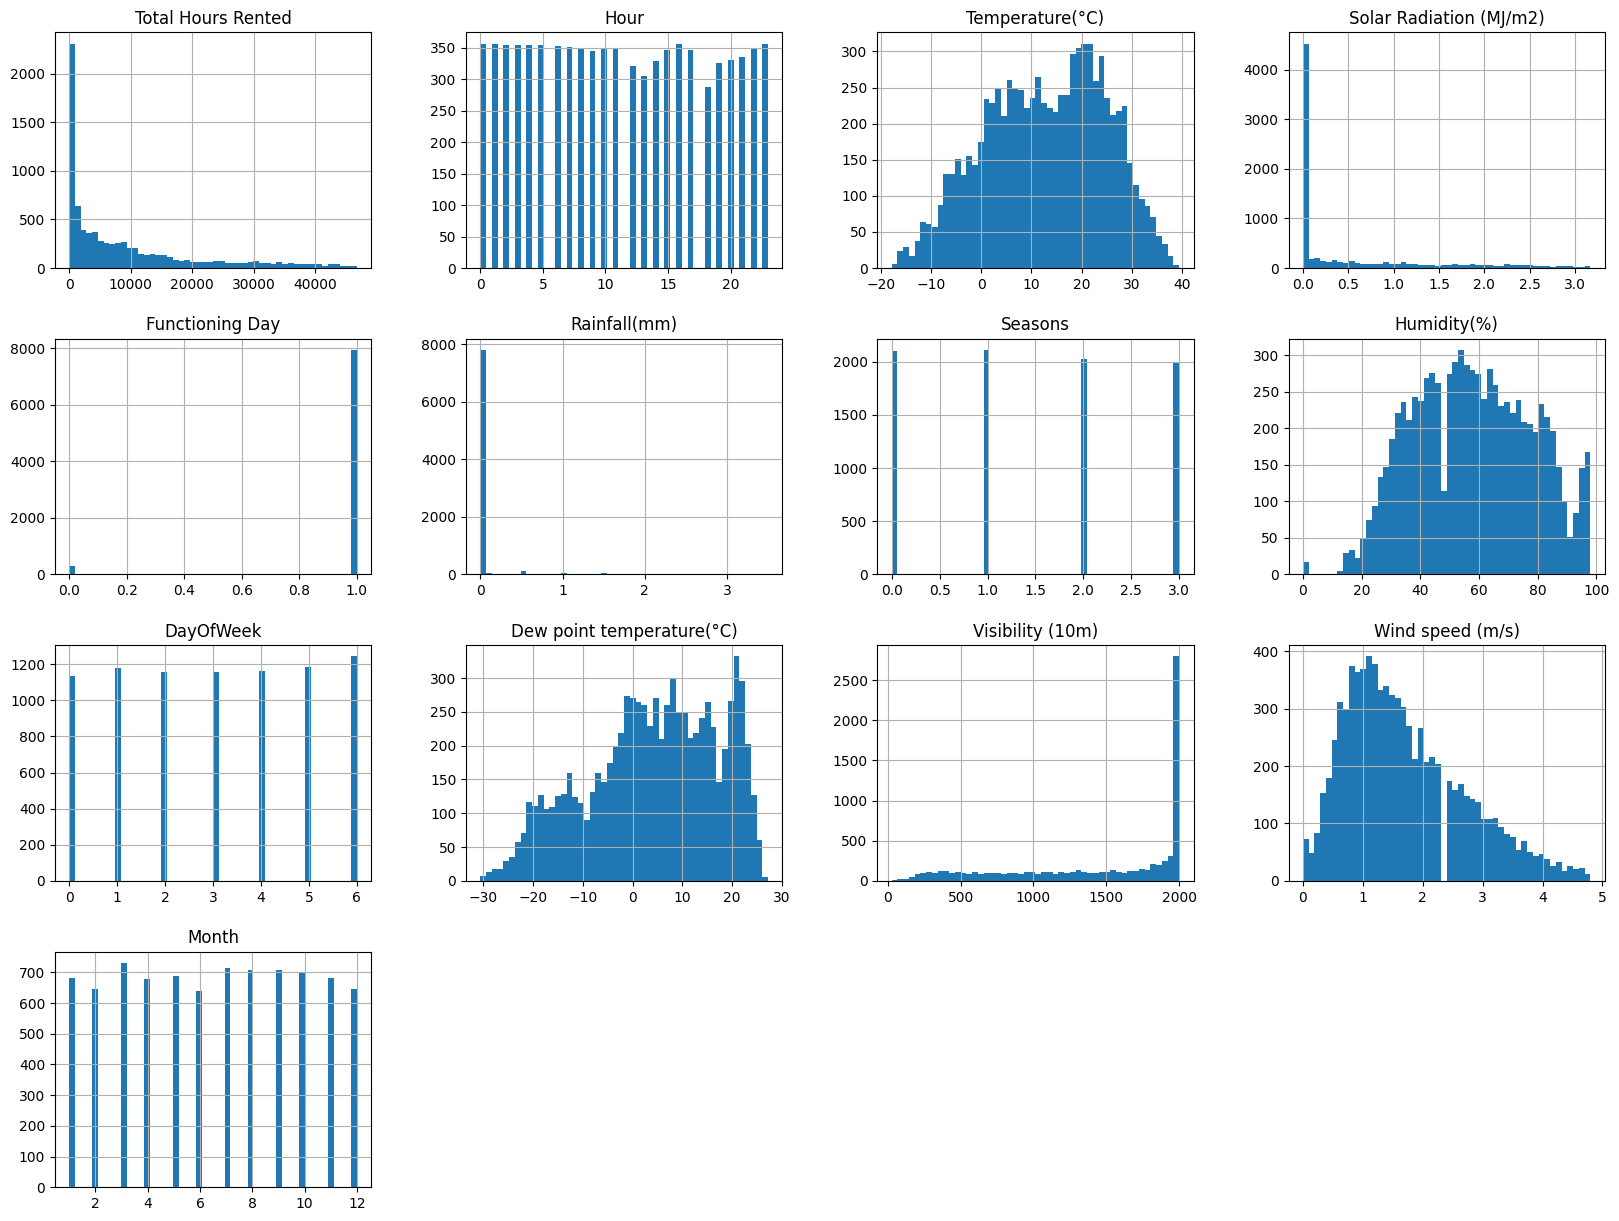

In [49]:
# Transform Your data
data[selected_features].hist(bins=50, figsize=(20, 15))
plt.show()

### 6. Data Scaling

In [50]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[selected_features] = scaler.fit_transform(data[selected_features])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [51]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Assuming 'data' contains your features and 'target' contains your target variable
X = data[selected_features]
y = data['Rented Bike Count']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [53]:
# Handling Imbalanced Dataset (If needed)
Check_for_imbalnce = data['Rented Bike Count'].value_counts()
Check_for_imbalnce

0       288
262      19
223      19
103      17
170      17
       ... 
1321      1
1499      1
836       1
887       1
595       1
Name: Rented Bike Count, Length: 2044, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [54]:
# # ML Model - 1 Implementation

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Create a random forest classifier
# rf_classifier = RandomForestClassifier()

# # Train the classifier on the training data
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = rf_classifier.predict(X_test)
# # Fit the Algorithm

# # Predict on the model

In [55]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Assuming 'y_test' and 'y_pred' are your true labels and predicted labels respectively
# # Calculate precision, recall, and F1-score
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [60]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [63]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [64]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***